In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],-1)/255
X_test = X_test.reshape(X_test.shape[0],-1)/255
ten_classes_eye = np.eye(10)
Y_train = ten_classes_eye[Y_train]
Y_test = ten_classes_eye[Y_test]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [3]:
network = Sequential()
network.add(Dense(1000,activation=tf.nn.tanh,input_shape=(784,)))
network.add(Dense(200,activation=tf.nn.tanh))
network.add(Dense(10))
network.compile(
    loss=tf.losses.softmax_cross_entropy,
    optimizer=Adam(),
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
#train
network.fit(X_train,Y_train,64,8)

Epoch 1/8
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2307 - acc: 0.9309
Epoch 2/8
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1116 - acc: 0.9668
Epoch 3/8
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0851 - acc: 0.9740
Epoch 4/8
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0709 - acc: 0.9783
Epoch 5/8
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0580 - acc: 0.9819
Epoch 6/8
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0500 - acc: 0.9845
Epoch 7/8
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0435 - acc: 0.9860
Epoch 8/8
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0387 - acc: 0.9877


In [5]:
def image_compose(datas,rows,cols,weight,height):
    rows_data=[]    
    for y in range(0, rows):
        one_rows_data = []
        for x in range(0, cols):
            image_data = datas[y*cols+x]
            data_w = image_data.shape[1]
            data_h = image_data.shape[0]
            if data_w != weight or data_h !=height:
                new_data = np.zeros((height,weight))
                new_data[0:data_h,0:data_w] = image_data
                image_data = new_data
            one_rows_data.append(image_data)
        rows_data.append(np.concatenate(one_rows_data,axis=1))
    data = np.concatenate(rows_data,axis=0)
    return data

In [6]:
loss,accuracy = network.evaluate(X_test,Y_test)
print("loss = ",loss)
print("accuracy = ",accuracy)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.0837 - acc: 0.9754
loss =  0.08374441238609143
accuracy =  0.9754


Accuracy =  0.98


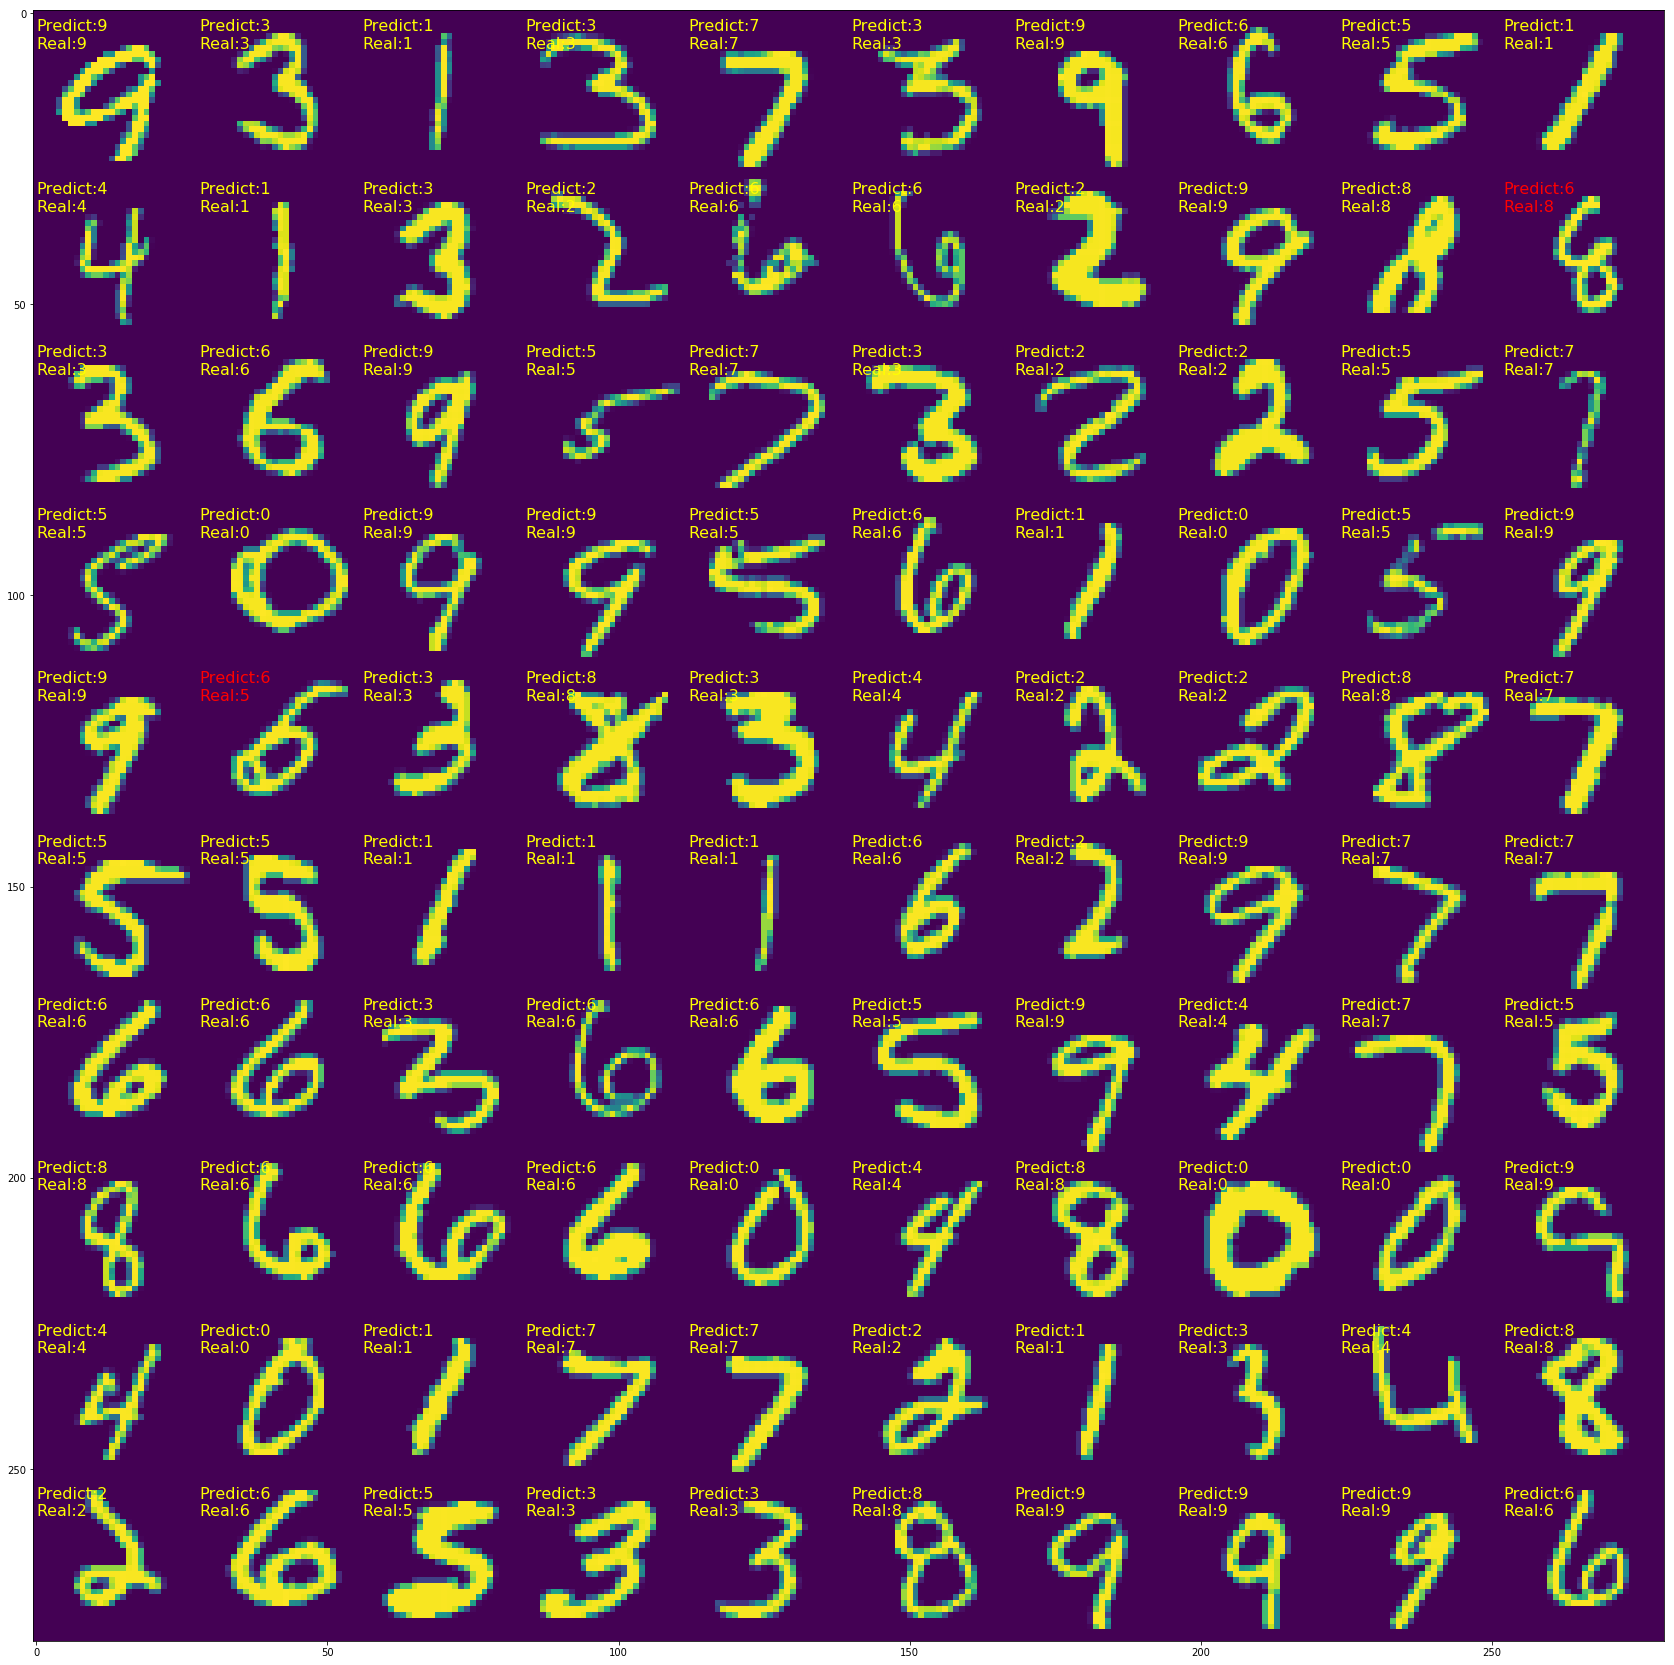

In [7]:
SAMPLE_NUM = 100
ROW_NUM = 10
COL_NUM = SAMPLE_NUM//ROW_NUM
CELL_WIDTH = 28
CELL_HEIGHT = 28

test_lens = X_test.shape[0]
nsd = np.random.RandomState(2019)
index_samples = nsd.choice(test_lens,SAMPLE_NUM,replace=False)
X_sample = X_test[index_samples]
X_sample_image = X_sample.reshape((-1,CELL_WIDTH,CELL_HEIGHT))
Y_sample = Y_test[index_samples]

images = image_compose(X_sample_image,ROW_NUM,COL_NUM,CELL_WIDTH,CELL_HEIGHT)
plt.figure(figsize=(30,30))
plt.imshow(images)

Y_sample_predict = network.predict(X_sample)
sample_predicts = np.argmax(Y_sample_predict,axis=1)
sample_labels = np.argmax(Y_sample,axis=1)

result_v = sample_predicts == sample_labels
accuracy = np.count_nonzero(result_v)/ len(result_v)
print("Accuracy = ",accuracy)

for row in range(ROW_NUM):
    for col in range(COL_NUM):
        index = row * COL_NUM +col
        pre = sample_predicts[index]
        label = sample_labels[index]
        label_color = "yellow" if result_v[row*COL_NUM+col] else "red"
        plt.text(col*CELL_WIDTH,row*CELL_HEIGHT+6,"Predict:{}\nReal:{}".format(pre,label),color=label_color,fontsize=16)
plt.show()